In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate

In [2]:
train = pd.read_csv('Train_data.csv')

In [3]:
test = pd.read_csv('Test_data.csv')

In [4]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train.shape

(25192, 42)

In [7]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<Axes: xlabel='class', ylabel='count'>

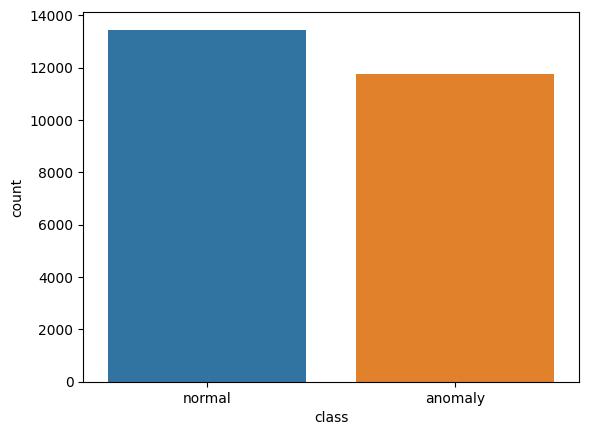

In [8]:
sns.countplot(x=train['class'])

In [9]:
train['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [10]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [11]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [12]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

<Axes: xlabel='feature'>

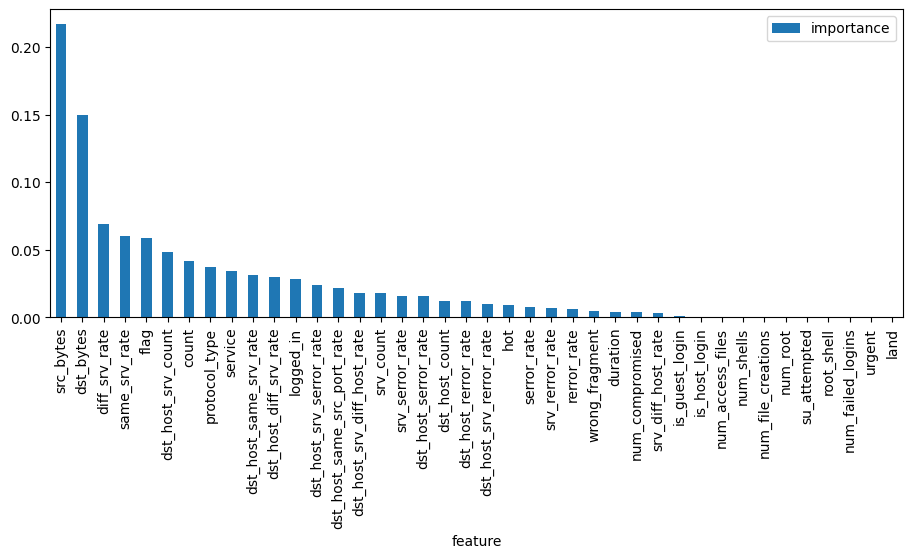

In [13]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [14]:
rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=30)
rfe = rfe.fit(X_train, Y_train)
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]
selected_features

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'logged_in',
 'num_compromised',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [15]:
X_train = X_train[selected_features]

In [16]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [18]:
x_train.shape

(17634, 30)

In [19]:
x_test.shape

(7558, 30)

In [20]:
knn = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski')
knn.fit(x_train,y_train)
knn_y_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score
knn_accuracy= accuracy_score(y_test,knn_y_pred)
print(knn_accuracy)

0.9854458851548028


In [21]:
svc = SVC(kernel="linear",random_state=0)
svc.fit(x_train,y_train)
svc_y_pred = svc.predict(x_test)
svm_accuracy=accuracy_score(y_test,svc_y_pred)
print(svm_accuracy)

0.9587192378936227


In [22]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
lg_accuracy= accuracy_score(y_test,y_pred)
print(lg_accuracy)

0.9552791743847578


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_y_pred = gb.predict(x_test)
gb_accuracy= accuracy_score(y_test,gb_y_pred)
print(gb_accuracy)

0.9944429743318338


In [24]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(x_train,y_train)
clf_y_pred = clf.predict(x_test)
rf_accuracy= accuracy_score(y_test,clf_y_pred)
print(rf_accuracy)

0.9973537973008733


In [25]:
xgb = XGBClassifier(objective="binary:logistic", random_state=42)
xgb.fit(x_train, y_train)
xgb_y_pred = xgb.predict(x_test)
xgb_accuracy= accuracy_score(y_test,xgb_y_pred)
print(xgb_accuracy)

0.9968245567610479


In [26]:
lgb = LGBMClassifier(random_state=42)
lgb.fit(x_train, y_train)
lgb_y_pred = lgb.predict(x_test)
lgb_accuracy= accuracy_score(y_test,lgb_y_pred)
print(lgb_accuracy)

[LightGBM] [Info] Number of positive: 9389, number of negative: 8245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2718
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532437 -> initscore=0.129932
[LightGBM] [Info] Start training from score 0.129932
0.997618417570786


In [27]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)
ab_y_pred = ab.predict(x_test)
ab_accuracy= accuracy_score(y_test,ab_y_pred)
print(ab_accuracy)

0.9886213283937549


In [28]:
BNB = BernoulliNB()
BNB.fit(x_train, y_train)
BNB_y_pred = BNB.predict(x_test)
BNB_accuracy= accuracy_score(y_test,BNB_y_pred)
print(BNB_accuracy)

0.8945488224397989


In [29]:
v_clf = VotingClassifier(estimators=[("GradientBoosting", gb), ("RandomForestClassifier", clf),  ("XGBoost", xgb), ("LightGB", lgb)], voting = "hard")
v_clf.fit(x_train, y_train)
v_y_pred = v_clf.predict(x_test)
v_accuracy= accuracy_score(y_test,v_y_pred)
print(v_accuracy)

[LightGBM] [Info] Number of positive: 9389, number of negative: 8245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2718
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532437 -> initscore=0.129932
[LightGBM] [Info] Start training from score 0.129932
0.997221487165917


In [30]:
data = [["KNN", knn_accuracy], 
        ["Logistic Regression", lg_accuracy],
        ["Random Forest", rf_accuracy], 
        ["GBM", gb_accuracy], 
        ["XGBM", xgb_accuracy], 
        ["Adaboost", ab_accuracy], 
        ["light GBM", lgb_accuracy],
        ["Naive Baye Model", BNB_accuracy], 
        ["Voting", v_accuracy],
        ["SVM", svm_accuracy]]

col_names = ["Model", "Accuracy"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ KNN                 │   0.985446 │
├─────────────────────┼────────────┤
│ Logistic Regression │   0.955279 │
├─────────────────────┼────────────┤
│ Random Forest       │   0.997354 │
├─────────────────────┼────────────┤
│ GBM                 │   0.994443 │
├─────────────────────┼────────────┤
│ XGBM                │   0.996825 │
├─────────────────────┼────────────┤
│ Adaboost            │   0.988621 │
├─────────────────────┼────────────┤
│ light GBM           │   0.997618 │
├─────────────────────┼────────────┤
│ Naive Baye Model    │   0.894549 │
├─────────────────────┼────────────┤
│ Voting              │   0.997221 │
├─────────────────────┼────────────┤
│ SVM                 │   0.958719 │
╘═════════════════════╧════════════╛
